---
title: Prepared for Gabor's Data Analysis
jupyter: python3
---


### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 18
**CH18 Forecasting daily ticket sales for a swimming pool**

using swim data

version 0.9.0 2025-08-14


### 🐍 Bellonda's Decoder: The Setup Phase

**1. The "Why are we doing this?"**
Before we can predict ticket sales, we need to equip our character (the Python script) with skills. We're loading libraries: `pandas` for tables, `numpy` for math, and `seaborn` for pretty pictures.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `import ... as ...` | **The Alias** | "Load this library but call it by a nickname so I don't have to type `pandas` 500 times." |
| `warnings.filterwarnings` | **The Silencer** | "Tell Python to shut up about minor complaints so our output remains clean." |

**3. 👔 The Manager Translation**
"We are setting up the software environment with the necessary tools for analysis."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** If you don't install these libraries (`pip install pandas pyfixest`), this cell will crash immediately.

In [12]:
# ---------------------------------------------------------
# Bringing tools from the void
# ---------------------------------------------------------
import os  # Operating System: The map to our file locations
import sys  # System: To manipulate the path of our journey
import warnings  # Warnings: To silence the minor spirits
from datetime import datetime  # Time: To understand the flow of ages

import numpy as np  # NumPy: The fundamental math of the elves
import pandas as pd  # Pandas: The table-manipulation magic
import seaborn as sns  # Seaborn: To weave beautiful visual illusions
from matplotlib import pyplot as plt  # Matplotlib: The canvas for our art
import pandas_market_calendars as mcal  # Calendars: Knowledge of the holidays
import pyfixest as pf  # PyFixest: High-performance econometric spells
from sklearn.metrics import root_mean_squared_error  # RMSE: The judge of our accuracy

# Silencing warnings to keep the mind clear
warnings.filterwarnings("ignore")

### 🐍 Bellonda's Decoder: The GPS Setup

**1. The "Why are we doing this?"**
We need to tell Python exactly where our data lives (`data_in`) and where to dump our results (`output`). Hardcoding paths is for amateurs; we build them dynamically so they work on any machine.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `os.getcwd()` | **The Compass** | "Where am I right now?" |
| `sys.path.append()` | **The Bridge** | "Add this new folder to the list of places Python looks for code." |

**3. 👔 The Manager Translation**
"Configuring file directories so the automation runs smoothly on any computer."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** `os.getcwd()` depends on where you *run* the script from. If you run this from a different folder, all your paths might break!

In [13]:
# ---------------------------------------------------------
# Setting the Path: Where does our journey begin?
# ---------------------------------------------------------
# Current script folder - finding our feet
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# Defining the locations of our artifacts (Directories)
data_in = dirname + "da_data_repo/swim-transactions/clean/"
data_out = dirname + "da_case_studies/ch18-swim-transactions/"
output = dirname + "da_case_studies/ch18-swim-transactions/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"

# Adding the function directory to our spellbook path
sys.path.append(func)

### 🐍 Bellonda's Decoder: The Interior Decorator

**1. The "Why are we doing this?"**
Default matplotlib charts are ugly. We are importing a custom theme helper (`py_helper_functions`) to make our charts look professional (and consistent with the book).

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `sns.set_theme()` | **The Vibe** | "Change the global defaults (colors, fonts) for all future plots." |

**3. 👔 The Manager Translation**
"Applying our corporate branding/style guide to the charts."

In [14]:
import py_helper_functions as da

# Set custom color scheme for plots - The Robes of the Mage
sns.set_theme(rc=da.da_theme, palette=da.color)

### Read data

### 🐍 Bellonda's Decoder: The Ingestion (With a Twist)

**1. The "Why are we doing this?"**
We are loading the raw data. BUT, we are doing something specific: `parse_dates`. If we don't do this, dates are just text strings, and we can't do math with them.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `pd.read_csv()` | **The Loader** | "Open this text file and turn it into a DataFrame." |
| `parse_dates=['date']` | **The Converter** | "Find the column named 'date' and instantly turn it into actual Time objects." |

**3. 👔 The Manager Translation**
"Importing the sales records."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** If you forget `parse_dates`, you'll have to manually convert it later with `pd.to_datetime()`. Do it now and save time.

In [15]:
# Reading the scroll (CSV) and interpreting the "date" runes immediately
daily_agg = pd.read_csv(os.path.join(data_in, "swim_work.csv"), parse_dates=["date"])
# daily_agg = pd.read_csv("https://osf.io/download/jcxmk/", parse_dates=["date"])

### 🐍 Bellonda's Decoder: The Vibe Check

**1. The "Why are we doing this?"**
Never trust a clear pipeline. Always look at the first few rows to make sure the data loaded correctly and isn't garbage.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.head()` | **The Peek** | "Show me the top 5 rows." |

**3. 👔 The Manager Translation**
"Verifying data integrity."

In [16]:
# Inspecting the head

daily_agg.head()

,date,QUANTITY
0,2010-01-01,0
1,2010-01-02,49
2,2010-01-03,31
3,2010-01-04,14
4,2010-01-05,18


### 🐍 Bellonda's Decoder: The Butcher Shop (Date Chopping)

**1. The "Why are we doing this?"**
We can't feed a raw date like "2015-01-01" into a math model. It gets confused. We need to chop it up into pieces it understands: "It's a Thursday", "It's January", "It's 2015".

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.dt` | **The Accessor** | "Unlock the special time-travel methods for this column." |
| `.dt.dayofweek` | **The Extraction** | "Give me 0 for Monday, 6 for Sunday." |
| `.isin([6, 7])` | **The Trap** | "Check if the value is INSIDE this list (Saturday or Sunday)." |

**3. 👔 The Manager Translation**
"Breaking down the dates to analyze performance by day of week and month."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** `dayofweek` starts at 0 (Monday) in Python. If you think 1 is Monday, you're gonna have a bad time. That's why we added `+ 1`.

### 🐍 Bellonda's Decoder: The History Book

**1. The "Why are we doing this?"**
Now we look at the older data (2010-2014) to see if the pattern holds up over time. Consistency = Predictability.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `daily_agg.loc[...]` | **The Filter** | "Select rows based on a condition (Year between 2010 and 2014)." |

**3. 👔 The Manager Translation**
"Reviewing historical trends."

In [17]:
# Extracting time components using the .dt accessor
daily_agg["year"] = daily_agg["date"].dt.year # The Year (e.g., 2015)
daily_agg["quarter"] = daily_agg["date"].dt.quarter # The Quarter (1-4)
daily_agg["month"] = daily_agg["date"].dt.month # The Month (1-12)
daily_agg["day"] = daily_agg["date"].dt.day # The Day of the month (1-31)
daily_agg["dow"] = daily_agg["date"].dt.dayofweek + 1 # Day of Week (Mon=1, Sun=7)

# Identifying Weekends: Is the day Saturday (6) or Sunday (7)?
daily_agg["weekend"] = daily_agg["dow"].isin([6, 7])

### 🐍 Bellonda's Decoder: The Logic Gate (Complex Masks)

**1. The "Why are we doing this?"**
We need to flag specific days when schools are closed, because that affects swimming pool traffic. This isn't just "Summer"; it's a complex set of rules (Late May, August start, Winter break).

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `&` | **The AND** | "Both things must be true." |
| `|` | **The OR** | "At least one thing must be true." |
| `( ... )` | **The Guard Rails** | "CRITICAL. You MUST use parentheses to group logic, or Python gets confused." |

**3. 👔 The Manager Translation**
"Identifying school holidays to adjust our forecasts."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** If you use the English words `and` / `or` here, Pandas will crash. You MUST use the bitwise operators `&` / `|`.

In [18]:
# Creating the "School Off" mask using Bitwise Logic (&, |)
# Parentheses are critical here to enforce order of operations!
daily_agg["school_off"] = (
    ((daily_agg["day"] > 15) & (daily_agg["month"] == 5) & (daily_agg["day"] <= 30)) # Late May
    | ((daily_agg["month"] == 6) | (daily_agg["month"] == 7)) # June or July (Support Summer)
    | ((daily_agg["day"] < 15) & (daily_agg["month"] == 8)) # Early August
    | ((daily_agg["day"] > 20) & (daily_agg["month"] == 12)) # Late December (Winter Break)
)

### 🐍 Bellonda's Decoder: The Arrow of Time

**1. The "Why are we doing this?"**
Time usually moves forward (unless you are a Time Lord). We create a simple counter (`1, 2, 3...`) to represent this linear progression, which helps models capture "Growth" over time.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.index + 1` | **The Counter** | "Use the row numbers as a proxy for time." |

**3. 👔 The Manager Translation**
"Adding a trend line to see if sales are generally going up or down."

In [19]:
# Creating a simple linear trend for time
daily_agg["trend"] = daily_agg.index + 1

In [20]:
# Get holiday calendar ----------------------------------

### 🐍 Bellonda's Decoder: Cheating with External Data

**1. The "Why are we doing this?"**
The swimming pool is closed on holidays. We *could* type out every holiday manually, but that's dumb. we use a library (`pandas_market_calendars`) to pull the NYSE holiday list. If the bankers are off, the kids are swimming.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `mcal.get_calendar("NYSE")` | **The Source** | "Download the Wall Street schedule." |
| `.isin(holidays)` | **The Cross-ref** | "Check if our dates appear in that holiday list." |

**3. 👔 The Manager Translation**
"Integrating public holiday data to account for closures."


In [21]:
nyse = mcal.get_calendar("NYSE")

holidays = nyse.holidays().holidays

daily_agg["isHoliday"] = daily_agg["date"].isin(holidays)

### 🐍 Bellonda's Decoder: The 10,000 Foot View

**1. The "Why are we doing this?"**
Before we build fancy models, we look at the basic stats. Averages, max, min. If the max ticket sales is 1 million, we know something is wrong.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.describe()` | **The Summary** | "Calculate count, mean, std, min, max for every column." |

**3. 👔 The Manager Translation**
"Checking the summary statistics."

In [22]:
# A quick glance at the numerical summaries (Distribution Check)
daily_agg.describe()

,date,QUANTITY,year,quarter,month,day,dow,trend
count,2557,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,2013-07-02 00:00:00,47.867032,2013.000782,2.508408,6.522487,15.730935,4.001173,1279.000000
min,2010-01-01 00:00:00,0.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2011-10-02 00:00:00,14.000000,2011.000000,2.000000,4.000000,8.000000,2.000000,640.000000
50%,2013-07-02 00:00:00,28.000000,2013.000000,3.000000,7.000000,16.000000,4.000000,1279.000000
75%,2015-04-02 00:00:00,64.000000,2015.000000,4.000000,10.000000,23.000000,6.000000,1918.000000
max,2016-12-31 00:00:00,287.000000,2016.000000,4.000000,12.000000,31.000000,7.000000,2557.000000
std,NaN,50.491050,2.000587,1.117346,3.449499,8.802361,2.000097,738.286643


### Define vars for analysis

### 🐍 Bellonda's Decoder: The Broadcaster (Transform)

**1. The "Why are we doing this?"**
This is a pro move. We want to know the *average* sales for "January" but we want to stick that number next to *every single day* in January. This allows us to compare "Today" vs "Typical Day".

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.groupby("month")` | **The Buckets** | "Put all Januaries in one bucket, all Februaries in another." |
| `.transform("mean")` | **The Broadcaster** | "Calculate the mean for the bucket, then *broadcast* it back to every original row." |
| `np.log()` | **The Squasher** | "Compress large numbers to reduce the effect of massive outliers." |

**3. 👔 The Manager Translation**
"Calculating seasonal baselines (monthly and weekly patterns)."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** standard `.mean()` shrinks your data to 12 rows. `.transform("mean")` keeps it at N rows. Use the right one!

In [23]:
# 1. Monthly Seasonality (Mean Quantity per Month)
daily_agg["q_month"] = daily_agg.groupby("month")["QUANTITY"].transform("mean")

# 2. Log Transformation (Stabilizing the Variance)
daily_agg["q_ln"] = np.log(daily_agg["QUANTITY"])

# Handling the Void (Inf/-Inf): Replace infinite values with NaN so they don't break the model
daily_agg["q_ln"] = daily_agg["q_ln"].replace([np.inf, -np.inf], np.nan)

# 3. Weekly Seasonality within Months (Mean Quantity per Month-DayOfWeek combination)
daily_agg["tickets"] = daily_agg.groupby(["month", "dow"])["QUANTITY"].transform("mean")

# 4. Log Version of Weekly Seasonality
daily_agg["tickets_ln"] = daily_agg.groupby(["month", "dow"])["q_ln"].transform("mean")

# 5. Abbreviations for visualization (e.g., 'Mon', 'Jan')
daily_agg["dow_abb"] = daily_agg["date"].dt.day_name().str[:3]
daily_agg["month_abb"] = daily_agg["date"].dt.month_name().str[:3]

## Descriptive graphs



### 🐍 Bellonda's Decoder: The Microscope

**1. The "Why are we doing this?"**
If we plot all 5 years, it looks like a mess. We zoom in on one year (2015) to see the heartbeat of the business—the weekly cycles.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `sns.lineplot()` | **The Artist** | "Draw a line connecting the dots." |
| `plt.xticks()` | **The Labels** | "Force the X-axis to show readable dates instead of random numbers." |

**3. 👔 The Manager Translation**
"Visualizing the daily sales rhythm for 2015."

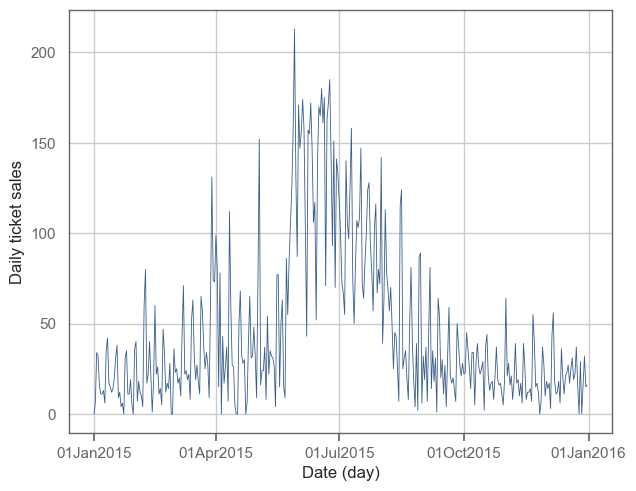

In [24]:
# Focusing on a single year (2015) to see the daily rhythm
filtered_data = daily_agg[daily_agg["year"] == 2015].reset_index()

# Drawing the line of time
sns.lineplot(data=filtered_data, x="date", y="QUANTITY", linewidth=0.6)

# Calibrating the X-Axis labels (The tick marks)
date_ticks = ["2015-01-01", "2015-04-01", "2015-07-01", "2015-10-01", "2016-01-01"]
plt.xticks(date_ticks, [pd.to_datetime(date).strftime("%d%b%Y") for date in date_ticks])

# Labelling the axes for the observer
plt.xlabel("Date (day)")
plt.ylabel("Daily ticket sales")
plt.show()

### 🐍 Bellonda's Decoder: The History Book

**1. The "Why are we doing this?"**
Now we look at the older data (2010-2014) to see if the pattern holds up over time. Consistency = Predictability.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `daily_agg.loc[...]` | **The Filter** | "Select rows based on a condition (Year between 2010 and 2014)." |

**3. 👔 The Manager Translation**
"Reviewing historical trends."

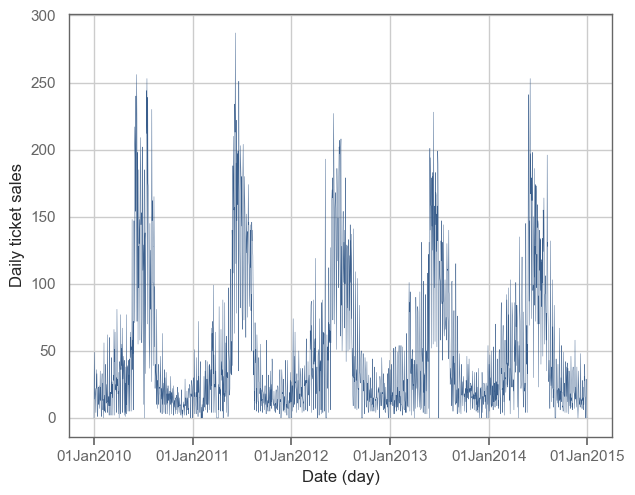

In [25]:
filtered_data = daily_agg.loc[
    (daily_agg.year >= 2010) & (daily_agg.year <= 2014), :
].reset_index()

sns.lineplot(data=filtered_data, x="date", y="QUANTITY", linewidth=0.3)
date_ticks = [
    "2010-01-01",
    "2011-01-01",
    "2012-01-01",
    "2013-01-01",
    "2014-01-01",
    "2015-01-01",
]
plt.xticks(date_ticks, [pd.to_datetime(date).strftime("%d%b%Y") for date in date_ticks])
plt.xlabel("Date (day)")
plt.ylabel("Daily ticket sales")
plt.show()

### 🐍 Bellonda's Decoder: The Box of Truth

**1. The "Why are we doing this?"**
A line plot shows trends, but a Box Plot shows *variability*. We want to see: Are sales consistent in June, or do they fluctuate wildly?

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `sns.boxplot()` | **The Chart** | "Draw the distribution (Median, Quartiles, Outliers)." |
| `fliersize` | **The Diamonds** | "How big should the outlier dots be?" |

**3. 👔 The Manager Translation**
"Analyzing monthly sales volatility."

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


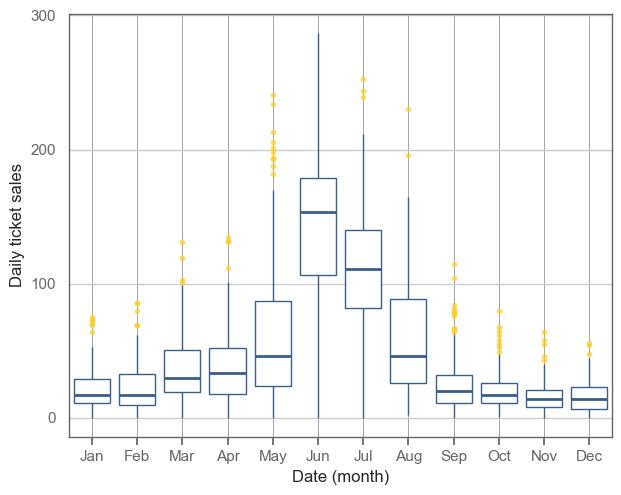

In [26]:
# Defining the Order: We force the months to align with the calendar, not the alphabet
month_order = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec",
]

# Summoning the Box Plot
sns.boxplot(
    data=daily_agg,
    x="month_abb", # Grouping by Month
    y="QUANTITY", # analyzing Ticket Sales
    fliersize=3, # Size of the outlier diamonds
    order=month_order, # Enforcing our custom order
    flierprops={
        "markerfacecolor": da.color[3], # coloring the outliers
        "markeredgecolor": da.color[3],
        "alpha": 0.6,
    },
    boxprops={"facecolor": "white", "edgecolor": da.color[0]},
    whiskerprops={"color": da.color[0]},
    medianprops={"color": da.color[0], "linewidth": 2},
    showcaps=False,
)
plt.yticks(np.arange(0, 400, 100)) # Calibrating the Y-axis
plt.xlabel("Date (month)")
plt.ylabel("Daily ticket sales")
plt.grid(axis="x", color="gray", linestyle="-", linewidth=0.5) # Adding a grid for precision
plt.show()

### 🐍 Bellonda's Decoder: The Weekly Grind

**1. The "Why are we doing this?"**
Same as above, but for Days of the Week. Is Monday dead? Is Sunday crazy? This confirms our weekly seasonality assumption.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `order=dow_order` | **The Sorter** | "Force the days to appear Mon->Sun, not alphabetically (Fri->Mon)." |

**3. 👔 The Manager Translation**
"Analyzing weekly sales volatility."

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


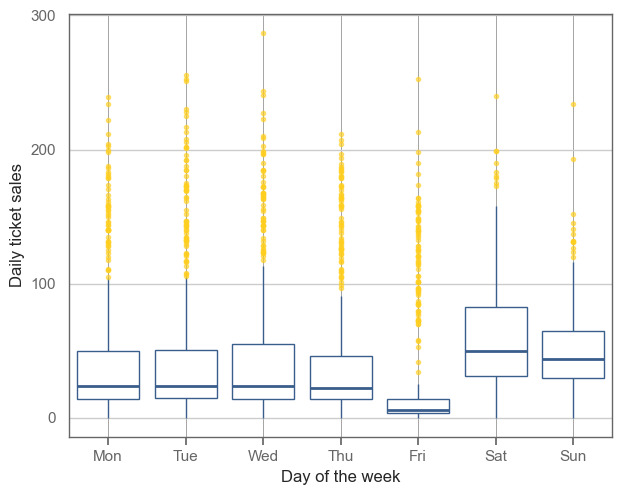

In [27]:
# Defining the Order of Days (Monday first!)
dow_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Summoning the Box Plot for Days of the Week
sns.boxplot(
    data=daily_agg,
    x="dow_abb",
    y="QUANTITY",
    fliersize=3,
    order=dow_order,
    flierprops={
        "markerfacecolor": da.color[3],
        "markeredgecolor": da.color[3],
        "alpha": 0.6,
    },
    boxprops={"facecolor": "white", "edgecolor": da.color[0]},
    whiskerprops={"color": da.color[0]},
    medianprops={"color": da.color[0], "linewidth": 2},
    showcaps=False,
)
plt.yticks(np.arange(0, 400, 100))
plt.xlabel("Day of the week")
plt.ylabel("Daily ticket sales")
plt.grid(axis="x", color="gray", linestyle="-", linewidth=0.5)
plt.show()

### 🐍 Bellonda's Decoder: Thermal Vision

**1. The "Why are we doing this?"**
We want to see the interaction between Month and Day. Are Sundays in July hotter than Sundays in December? A heatmap visualizes this 2D grid instantly.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `pd.Categorical(ordered=True)` | **The Enforcer** | "Tell Python that 'January' comes before 'February', logically." |
| `.pivot()` | **The Matrix** | "Reshape data so Rows=Month, Columns=Day, Values=Sales." |
| `sns.heatmap()` | **The IR Goggles** | "Color the cells based on value (Dark=Low, Light=High)." |

**3. 👔 The Manager Translation**
" identifying high-traffic hotspots."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** If you don't use `ordered=True`, your heatmap axis will be alphabetical (Apr, Aug, Dec...) which makes the seasonality impossible to read.

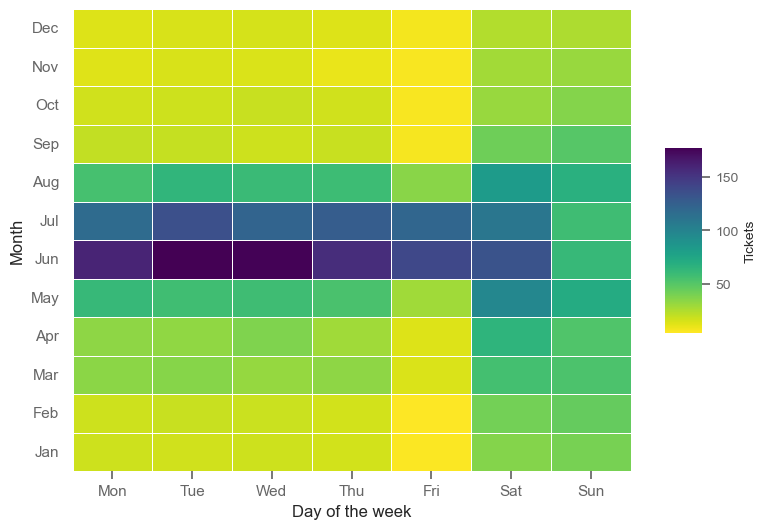

In [28]:
# to check for interactions, look at the heatmap
plt.figure(figsize=(9, 6))

# Enforcing Order on the Dimensions
daily_agg["dow_abb_ordered"] = pd.Categorical(
    daily_agg["dow_abb"], categories=dow_order, ordered=True
)
daily_agg["month_abb_ordered"] = pd.Categorical(
    daily_agg["month_abb"], categories=reversed(month_order), ordered=True
)

# Aggregating: Calculating Mean Tickets for each (Month, Day) pair
agg_data = daily_agg.groupby(["month_abb_ordered", "dow_abb_ordered"], as_index=False)[
    "tickets"
].mean()

# Pivoting: The Transformation to Matrix Form
heatmap_data = agg_data.pivot(
    index="month_abb_ordered", columns="dow_abb_ordered", values="tickets"
)

# Summoning the Heatmap
sns.heatmap(
    heatmap_data,
    cmap="viridis_r", # The color palette (Reversed Viridis)
    linewidths=0.5, # Grid lines
    linecolor="white",
    cbar_kws={"shrink": 0.4, "aspect": 5}, # Configuring the Legend Bar
)

plt.xlabel("Day of the week")
plt.ylabel("Month")
plt.yticks(rotation=0) # Keeping Y-labels horizontal for readability

# Adjusting the Color Bar (The Scale of Magic)
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label("Tickets", fontsize=10)
cbar.set_ticks([50, 100, 150])

plt.show()

### 🐍 Bellonda's Decoder: Thermal Vision (Log Scale)

**1. The "Why are we doing this?"**
Same heatmap, but using Log-sales. This dampens the extreme peaks and lets us see differences in the "quiet" months more clearly.

**3. 👔 The Manager Translation**
"Same analysis, adjusted for scale."

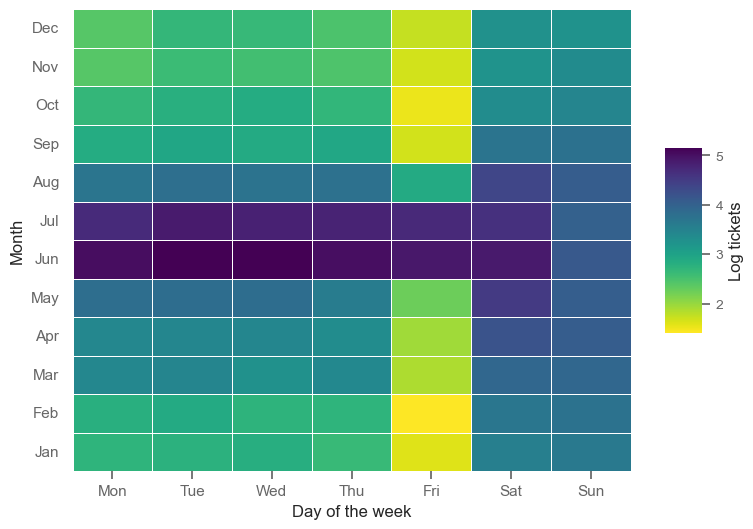

In [29]:
# not in book
# Repeating the Spell for Log-Transformed Data
plt.figure(figsize=(9, 6))
agg_data = daily_agg.groupby(["month_abb_ordered", "dow_abb_ordered"], as_index=False)[
    "tickets_ln"
].mean()

heatmap_data = agg_data.pivot(
    index="month_abb_ordered", columns="dow_abb_ordered", values="tickets_ln"
)

sns.heatmap(
    heatmap_data,
    cmap="viridis_r",
    linewidths=0.5,
    linecolor="white",
    cbar_kws={"shrink": 0.4, "aspect": 5, "label": "Log tickets"},
)

plt.xlabel("Day of the week")
plt.ylabel("Month")
plt.yticks(rotation=0)

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

plt.show()

## Prediction

### Creat train/holdout data



### 🐍 Bellonda's Decoder: The Time Travel Ban

**1. The "Why are we doing this?"**
We need to test our model. In normal Machine Learning, we shuffle the data randomly. In Time Series, **WE DO NOT SHUFFLE**. Because if you train on data from tomorrow to predict yesterday, you are cheating. It's called "Look-ahead Bias".

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `factor_cols` | **The Prep** | "Convert these columns to Categories (Factors) so the model treats them as groups, not numbers." |
| `.loc[year < 2016]` | **The Split** | "Keep everything BEFORE 2016 for training." |
| `.loc[year == 2016]` | **The Holdout** | "Keep 2016 locked away in a vault. We only touch this ONCE at the very end." |

**3. 👔 The Manager Translation**
"Splitting data into 'Past' (Training) and 'Future' (Testing) to simulate a real-world scenario."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** If you use `train_test_split(shuffle=True)`, your boss will fire you for delivering impossible accuracy.

In [30]:
# 1. Preparing the Factor columns (Categories)
factor_cols = ["month", "dow", "isHoliday", "school_off"]
daily_agg[factor_cols] = daily_agg[factor_cols].astype("category")

# 2. The Holdout Set (The Future: 2016)
data_holdout = daily_agg.loc[daily_agg["year"] == 2016, :]

# 3. The Training Set (The Past: 2010-2015)
data_train = daily_agg.loc[daily_agg["year"] < 2016, :]

### 🐍 Bellonda's Decoder: The Custom Gauntlet (Rolling CV)

**1. The "Why are we doing this?"**
Standard Cross-Validation functions are dumb about time. We need to build a custom loop that respects history. We train on Years A, B, C, D to predict Year E. Then we rotate.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `def function_name(...):` | **The Blueprint** | "We are creating a reusable tool." |
| `yield` or `append` | **The Collection** | "Store the score for this year, then move to the next." |
| `correct_log_...` | **The Math Hack** | "If we predicted log-sales, convert them back to real-sales so the boss understands the error." |

**3. 👔 The Manager Translation**
"Stress-testing the model across different historical years to ensure reliability."

In [31]:
# Frieren: A custom spell to iterate through time periods
def inserted_test_set_cv(
    formula: str,
    data: pd.DataFrame,
    group_col: str,
    correct_log_transformation_bias: bool = False,
) -> float:
    """
    Perform inserted test set cross-validation.
    """
    # 1. Input Parsing: Extracting the target variable name (Left side of ~)
    y_variable = formula.split("~")[0].strip()
    
    # 2. Cleaning: Dropping missing values in the target to avoid errors
    data = data.dropna(subset=[y_variable])

    # 3. Identifying the Epochs (Years) to iterate over
    test_sets = data[group_col].unique()
    rmse_folds = [] # The Accumulator for our results

    # 4. The Loop of Time
    for test_set in test_sets:
        # Define Training Data: Everything EXCEPT the current test year
        data_train = data.loc[data[group_col] != test_set, :]
        
        # Define Test Data: ONLY the current test year
        data_test = data.loc[data[group_col] == test_set, :]

        # 5. Training the Model (Fitting the spell)
        model = pf.feols(formula, data=data_train)

        # 6. Forecasting
        y_hat = model.predict(data_test)
        y_true = data_test[y_variable]
        
        # 7. Evaluating Accuracy (RMSE)
        rmse = root_mean_squared_error(y_true, y_hat)

        # 8. Correction for Log-Models (If we predicted log(y), we must convert back)
        if correct_log_transformation_bias:
            # Applying the correction factor exp(sigma^2 / 2)
            y_hat = np.exp(y_hat) * np.exp(rmse**2 / 2)
            y_true = np.exp(y_true)
            # Re-calculating RMSE in the original scale
            rmse = root_mean_squared_error(y_true, y_hat)

        # Storing the result
        rmse_folds.append(rmse)

    # Frieren: aggregating the shards of time into a single truth (Mean Probability)
    return np.mean(rmse_folds)

### 🐍 Bellonda's Decoder: The Formula Book

**1. The "Why are we doing this?"**
We don't know which combination of variables works best. So we define 5 candidates, ranging from "Stupid Simple" (Model 1) to "Galaxy Brain" (Model 5).

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `"y ~ x1 + x2"` | **The Recipe** | "Predict Y using ingredients X1 and X2." |
| `*` (e.g., `school_off*dow`) | **The Interaction** | "Check if 'School Off' has a *different* impact on Mondays vs Fridays." |

**3. 👔 The Manager Translation**
"Hypothesizing different drivers of sales (Holidays vs Trends vs Seasonality)."

In [32]:
# ---------------------------------------------------------
# Defining the complexity tiers
# ---------------------------------------------------------

# Model 1: The Simplest Spell (Linear Trend + Month)
model1 = "QUANTITY ~ trend + month"

# Model 2: Adding Weekly Rhythms (+ Day of Week)
model2 = "QUANTITY ~ trend + month + dow"

# Model 3: Injecting External Knowledge (+ Holidays)
model3 = "QUANTITY ~ trend + month + dow + isHoliday"

# Model 4: Handling Special Events (+ School Off Interaction)
# Note: 'school_off*dow' adds both the main effect and the interaction
model4 = "QUANTITY ~ trend + month + dow + isHoliday + school_off*dow"

# Model 5: The Grand Arch-Mage Spell (Full Complexity)
# Adding interactions between Weekend and Month (Summer weekends vs Winter weekends)
model5 = "QUANTITY ~ trend + month + dow + isHoliday + school_off*dow + weekend*month"

### 🐍 Bellonda's Decoder: The Tournament

**1. The "Why are we doing this?"**
We have 5 gladiators (Models). We throw them into the arena (The Cross-Validation Loop). Only one survives.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `for model in [...]` | **The Loop** | "Execute the test for every candidate." |
| `cross_validated_rmses.append()` | **The Scoreboard** | "Write down the error score." |

**3. 👔 The Manager Translation**
"Benchmarking our models against each other."

In [33]:
# The Evaluation Ritual: Testing each spell against the flow of time
cross_validated_rmses = []

for model in [model1, model2, model3, model4, model5]:
    # Running the Temporal Cross-Validation
    rmse = inserted_test_set_cv(model, data_train, "year")
    cross_validated_rmses.append(rmse)

### 🐍 Bellonda's Decoder: The Logarithmic Twist

**1. The "Why are we doing this?"**
Ticket sales can't be negative, and they might grow exponentially. A linear model assumes straight lines. By taking the `log()` of sales, we make the curve straight, fit the model, and then bend it back at the end.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `q_ln ~ ...` | **The Target** | "Predict the Log-Quantity, not the Quantity." |
| `correct_log...=True` | **The Fix** | "Apply the special math correction when converting back." |

**3. 👔 The Manager Translation**
"Testing a specialized model for exponential growth."

In [34]:
# Model 6: The Logarithmic Alteration
# Sometimes mana flows exponentially. We take the log() to make it linear.
model6 = "q_ln ~ trend + month + dow + isHoliday + school_off*dow"

# We must fix the bias when converting back from Log-World to Real-World
rmse6 = inserted_test_set_cv(
    model6, data_train, "year", correct_log_transformation_bias=True
)
cross_validated_rmses.append(rmse6)

### Use prophet prediction

### 🐍 Bellonda's Decoder: Summoning the Oracle (Prophet)

**1. The "Why are we doing this?"**
Facebook built a forecasting tool called Prophet. It's famous. We are importing it to see if Zuckerberg's AI is smarter than our simple regression.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `Prophet()` | **The Factory** | "Create a new forecasting engine." |
| `yearly_seasonality='auto'` | **The Autopilot** | "Figure out the patterns yourself, robot." |
| `add_country_holidays` | **The Cheat Code** | "Automatically look up US holidays." |

**3. 👔 The Manager Translation**
"Comparing our custom model against an industry-standard AI tool."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** Prophet is strict. You MUST rename your columns to `ds` (Date) and `y` (Value), or it will error out.

In [35]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [38]:
# Frieren: Initializing the Oracle. Note 'additive' seasonality.
model_prophet = Prophet(
    seasonality_mode="additive", # Adding effects (Trend + Season + Holiday)
    yearly_seasonality="auto", # Detecting annual cycles automatically
    weekly_seasonality="auto", # Detecting weekly cycles
    growth="linear", # Assuming linear growth over time
    daily_seasonality=True, # Accounting for daily patterns
)

# Injecting the knowledge of US Holidays into the Oracle
model_prophet = Prophet.add_country_holidays(model_prophet, "US")

### 🐍 Bellonda's Decoder: Training the Oracle

**1. The "Why are we doing this?"**
We have to feed the data to Prophet. It's a hungry beast.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.rename()` | **The Uniform** | "Put on the 'ds' and 'y' name tags so Prophet recognizes you." |
| `.fit()` | **The Learning** | "Analyze the history." |

**3. 👔 The Manager Translation**
"Training the AI model."

In [40]:
# Fitting the Oracle to the Past
model_prophet = Prophet.fit(
    model_prophet,
    # Frieren: The Oracle demands 'ds' and 'y' columns. We must comply.
    df=data_train[["date", "QUANTITY"]].rename({"date": "ds", "QUANTITY": "y"}, axis=1),
)

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


### 🐍 Bellonda's Decoder: The Oracle's Test

**1. The "Why are we doing this?"**
Prophet has its own way of doing cross-validation. It simulates "standing in the past" and forecasting forward.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `initial='365 days'` | **The Start** | "Train on year 1." |
| `horizon='365 days'` | **The Goal** | "Predict year 2." |

**3. 👔 The Manager Translation**
"Backtesting the AI performance."

In [41]:
# Generating the Cross-Validation folds (Temporal Backtesting)
cv_pred = cross_validation(
    model_prophet, 
    initial="365 days", # Training on at least 1 year
    period="365 days", # Moving forward by 1 year at a time
    horizon="365 days" # Predicting 1 year into the future
)

INFO:prophet:Making 5 forecasts with cutoffs between 2011-01-01 00:00:00 and 2014-12-31 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [1] done processing


### 🐍 Bellonda's Decoder: Grading the Oracle

**1. The "Why are we doing this?"**
Prophet spits out a complex table. We just want one number: The RMSE (Error score).

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `performance_metrics` | **The Grader** | "Calculate accuracy scores." |

**3. 👔 The Manager Translation**
"Getting the final score for the AI model."

In [42]:
# Extracting the RMSE from the Oracle's visions
rmse_prophet_cv = performance_metrics(cv_pred, rolling_window=1)["rmse"].values[0]
cross_validated_rmses.append(rmse_prophet_cv)

INFO:prophet:Skipping MAPE because y close to 0


### 🐍 Bellonda's Decoder: The Scoreboard

**1. The "Why are we doing this?"**
We have 7 candidates now (5 Linear, 1 Log, 1 Prophet). Who won? Lowest RMSE takes the crown.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `pd.DataFrame()` | **The Report** | "Make a nice table of the results." |

**3. 👔 The Manager Translation**
"Final model selection based on accuracy."

In [43]:
# Note: M6 log model rmse is slightly different from book
pd.DataFrame(
    cross_validated_rmses,
    ["M" + str(i) for i in range(1, 6)] + ["M6 (log)", "M7 (Prophet)"],
    columns=["RMSE"],
).round(5)

,RMSE
M1,32.34787
M2,31.44848
M3,31.45826
M4,27.60475
M5,26.90412
M6 (log),30.20278
M7 (Prophet),29.44663


## Evaluate best model on holdout set



### 🐍 Bellonda's Decoder: The Final Exam

**1. The "Why are we doing this?"**
We picked a winner (Model 5). Now, for the first time ever, we introduce it to 2016 (Holdout Data). This is the true test of real-world performance.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.predict(data_holdout)` | **The Forecast** | "Generate predictions for the future." |
| `root_mean_squared_error` | **The Grade** | "How far off were we?" |

**3. 👔 The Manager Translation**
"Confirming model reliability on fresh data before deployment."

In [44]:
best_model = pf.feols(model5, data=data_train)

data_holdout["y_hat_5"] = best_model.predict(data_holdout)

In [45]:
rmse_holdout_best = root_mean_squared_error(data_holdout.QUANTITY, data_holdout.y_hat_5)
rmse_holdout_best

24.577496175561176

### Plot best predictions

### 🐍 Bellonda's Decoder: The Report Card

**1. The "Why are we doing this?"**
A single error number hides details. Did we fail in August? Did we nail December? We group the error by month to find weak spots.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.groupby("month")` | **The Slice** | "Analyze performance month-by-month." |
| `lambda x: ...` | **The Mini-Function** | "A throwaway function to calculate RMSE for each group." |

**3. 👔 The Manager Translation**
"Diagnosing monthly forecast accuracy."

In [46]:
# graph relative RMSE (on holdout) per month

group = data_holdout.sort_values(by=["date"]).groupby("month")
rmse_monthly = pd.DataFrame(
    {
        "date": group["date"].first(),
        "RMSE": group.apply(
            lambda x: root_mean_squared_error(x["QUANTITY"], x["y_hat_5"])
        ),
        "RMSE_norm": group.apply(
            lambda x: root_mean_squared_error(x["QUANTITY"], x["y_hat_5"])
            / np.mean(x["QUANTITY"])
        ),
    }
).reset_index(drop=True)

### Figure 18.7 b)

### 🐍 Bellonda's Decoder: Visualizing Failure

**1. The "Why are we doing this?"**
We plot the monthly error bars. If one bar is huge, our model sucks at that time of year.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `sns.barplot` | **The Chart** | "Draw error bars." |

**3. 👔 The Manager Translation**
"Visualizing accuracy by season."

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


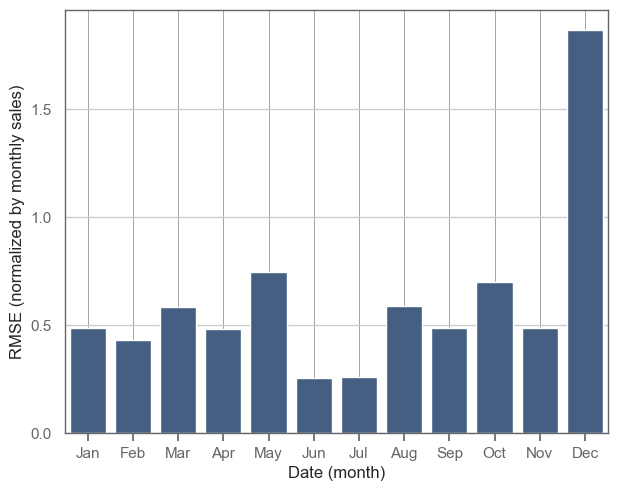

In [47]:
ax = sns.barplot(x="date", y="RMSE_norm", data=rmse_monthly)
ax.set_xticklabels(rmse_monthly["date"].dt.strftime("%b"))
ax.set_yticks(np.arange(0, 1.6, 0.5))
ax.set_xlabel("Date (month)")
ax.set_ylabel("RMSE (normalized by monthly sales)")
plt.grid(axis="x", color="gray", linestyle="-", linewidth=0.5)
plt.show()

### 🐍 Bellonda's Decoder: The Shape Shifter (Melt)

**1. The "Why are we doing this?"**
Our data is lazy: it has one column for "Actual" and one for "Predicted".
But Seaborn (the plotter) demands "Long Data". It wants one column called "Value" and another called "Type" (Actual/Predicted).
We `melt` the table to reshape it.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `.melt()` | **The Liquefier** | "Dissolve multiple columns into rows." |
| `.merge()` | **The Stitch** | "Glue the original data back on so we don't lose context." |
| `.assign()` | **The Label Maker** | "Add a new column with pretty names for the legend." |

**3. 👔 The Manager Translation**
"Formatting data for the final dashboard."

**4. 🍌 The Banana Peel (Watch Out!)**
> [!WARNING]
> **Don't slip here:** This chain of functions is a beast. If you miss one parenthesis, the whole thing breaks. Indentation is key.

In [48]:
# Frieren: Reshaping the timeline into a long format for the Sea-born Plotter (Seaborn)
plotdata = (
    data_holdout
    .filter(["date", "month", "QUANTITY", "y_hat_5"]) # Select only essential mana streams
    .melt(id_vars=["date", "month"]) # Unpivot: Collapsing Qty and Prediction into one column
    # Re-attaching the original values for reference (Self-Join)
    .merge(data_holdout.filter(["date", "QUANTITY"]), on="date") 
    .merge(data_holdout.filter(["date", "y_hat_5"]), on="date")
    # Renaming for clarity in the legend
    .rename(columns={"QUANTITY": "ymin", "y_hat_5": "ymax"})
    .assign(
        variable=lambda x: x["variable"].map(
            {"QUANTITY": "Actual", "y_hat_5": "Predicted"} # Renaming the labels
        )
    )
)

### Figure 18.6

### 🐍 Bellonda's Decoder: The Moment of Truth

**1. The "Why are we doing this?"**
The Final Chart. Actual Sales (Blue) vs Predicted Sales (Orange). If the lines overlap perfectly, we are wizards.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `hue="variable"` | **The Color** | "Color lines differently based on if they are 'Actual' or 'Predicted'." |

**3. 👔 The Manager Translation**
"The final forecast dashboard."

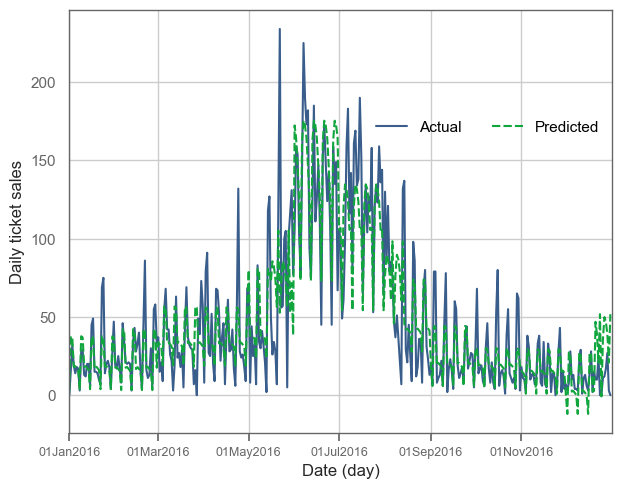

In [49]:
sns.lineplot(x="date", y="value", hue="variable", style="variable", data=plotdata)

xticks = pd.to_datetime(
    ["2016-01-01", "2016-03-01", "2016-05-01", "2016-07-01", "2016-09-01", "2016-11-01"]
)
xlabels = ["01Jan2016", "01Mar2016", "01May2016", "01Jul2016", "01Sep2016", "01Nov2016"]
plt.xticks(xticks, labels=xlabels, fontsize=9)
plt.xlim((datetime(2016, 1, 1), datetime(2017, 1, 1)))
plt.xlabel("Date (day)")
plt.ylabel("Daily ticket sales")
plt.legend(bbox_to_anchor=(0.54, 0.77), frameon=False, ncol=2)
plt.show()

### Figure 18.7 a)

### 🐍 Bellonda's Decoder: The Microscope (Again)

**1. The "Why are we doing this?"**
The year-long chart is crowded. We zoom in on August to check the daily fit.

**2. Syntax Autopsy (The Python)**
| Code Fragment | The Role | The Translation |
| :--- | :--- | :--- |
| `[plotdata["month"] == 8]` | **The Filter** | "Show me August." |

**3. 👔 The Manager Translation**
"Detailed inspection of peak season performance."

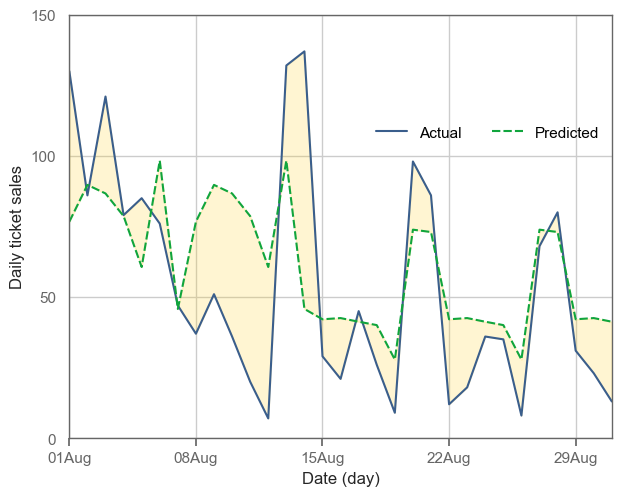

In [50]:
# Frieren: Focusing the mage sight on a single month (August) to inspect the fine details.
plotdata_august = plotdata[plotdata["month"] == 8].reset_index()
sns.lineplot(
    x="date",
    y="value",
    hue="variable",
    style="variable",
    data=plotdata_august,
    linewidth=1.5,
)

plt.fill_between(
    plotdata_august.loc[lambda x: x["variable"] == "Actual", "date"],
    plotdata_august.loc[lambda x: x["variable"] == "Actual", "ymin"],
    plotdata_august.loc[lambda x: x["variable"] == "Actual", "ymax"],
    color=da.color[3],
    alpha=0.2,
)
plt.xticks(
    pd.to_datetime(
        ["2016-08-01", "2016-08-08", "2016-08-15", "2016-08-22", "2016-08-29"]
    ),
    labels=["01Aug", "08Aug", "15Aug", "22Aug", "29Aug"],
)
plt.ylim(0, 150)
plt.xlim((datetime(2016, 8, 1), datetime(2016, 8, 31)))
plt.yticks(np.arange(0, 151, 50))
plt.xlabel("Date (day)")
plt.ylabel("Daily ticket sales")
plt.legend(
    title="", loc="upper left", bbox_to_anchor=(0.54, 0.77), frameon=False, ncol=2
)

plt.show()

# 🎓 The Senior Syntax Checklist

## 🛠️ Tools Mastery
| Method/Library | What it *actually* does | Generic Syntax Template |
| :--- | :--- | :--- |
| `pd.read_csv(parse_dates=...)` | Time-travel loader | `pd.read_csv('file.csv', parse_dates=['col'])` |
| `.dt.property` | Time extraction | `df['date'].dt.month` |
| `(A) & (B)` | Safe logic gates | `(df['A'] > 1) & (df['B'] < 5)` |
| `.transform()` | Broadcasting | `df.groupby('g')['v'].transform('mean')` |
| `.melt()` | Reshaping for plots | `df.melt(id_vars=['id'], value_vars=['A', 'B'])` |

## 👶 ELI5 Syntax Appendix (The "Explain Like I'm 5" Dictionary)
| Term | ELI5 Analogy | Minimal Example |
| :--- | :--- | :--- |
| `pd.DataFrame` | It's an Excel sheet that lives inside your computer's RAM. | `df = pd.DataFrame({"A": [1, 2]})` |
| `.groupby()` | Like sorting a deck of cards into piles by suit (Hearts, Spades). | `df.groupby("suit")` |
| `.transform("mean")` | Asking the dealer the average card value for each suit, then writing that number on *every* card of that suit. | `df.groupby("suit")["val"].transform("mean")` |
| `.melt()` | Taking a "wide" spreadsheet (cols: Jan, Feb, Mar) and making it "long" (rows: Month=Jan, Val=10). | `df.melt(id_vars=["ID"])` |
| `np.log()` | Squashing big numbers. Imagine a volume knob 1-100. Log turns it into 1-2. | `np.log(df["sales"])` |
| `Prophet` | A tiny robot provided by Facebook that is really good at guessing future patterns. | `m = Prophet(); m.fit(df)` |
| `RMSE` | The "Grade". It tells you how wrong you are on average. Lower is better. | `root_mean_squared_error(y_true, y_pred)` |
| `Boolean Mask` | A filter. Like sieve. We keep "True" rows and throw away "False" rows. | `mask = df["age"] > 18` |

## 🧠 Bellonda's Final Thought
"You survived the Time-Series Gauntlet. Most people quit after the `melt` function. You didn't. Go get a coffee."
